# Mini-Batch Gradient Descent Linear Regression

Developed a **linear regression model** to predict product sales based on **advertising budgets for TV, radio, and newspaper channels** using **mini-batch gradient descent** for parameter optimization.  
The project focused on implementing **gradient-based optimization from scratch**, demonstrating how iterative updates can efficiently approximate **least squares parameter estimates** without relying on closed-form solutions.

Key aspects of the project included:  
- **Vectorized implementation of mini-batch gradient descent** to accelerate computation for batch updates.  
- **Dynamic parameter updates** with tunable **learning rate (α)** and **batch size** to explore convergence behavior.  
- **Iterative training loop** to observe convergence to the optimal coefficients.  
- **Visualization of model training**, including:  
  - **Coefficient trajectories** for each feature and intercept across iterations.  
  - **Cost function decay** (sum of squared errors) over iterations.  
- **Performance evaluation** using **Mean Squared Error (MSE)** on the training set to quantify model fit.  

This project highlights foundational **machine learning skills** in **linear model implementation, gradient-based optimization, and model convergence analysis**, which are directly applicable to **predictive analytics and real-world regression problems**.

**Keywords:**  
**linear regression**, **mini-batch gradient descent**, **vectorized computation**, **iterative optimization**, **coefficient trajectory visualization**, **cost function minimization**, **MSE evaluation**, **predictive modeling**

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Connect to data
data = '/content/gdrive/My Drive/Advertising_N200_p3.csv'
print(os.path.exists(data))

True


In [4]:
# Read the CSV
df = pd.read_csv(data)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
# Generate N-dimensional response vector
y = df["sales"].values

In [6]:
# Create the Design Matrix
X = df[["TV", "radio", "newspaper"]].values

# Get observations and features
N = X.shape[0]
p = X.shape[1]

# Create ones column
ones_column = np.ones((N, 1))

# Create the Design Matrix (N x (p + 1))
# Concatenate ones column to left side of original matrix
X = np.hstack((ones_column, X))

print(X.shape)
#print(X)

(200, 4)


In [7]:
# Choose learning rate and batch size (n)
alpha = 0.0000025
n = 10

# Number of iterations
iterations = 20000


B = N // n
mixed_N = np.random.permutation(N)
mini_batches = np.array_split(mixed_N, B)


def gradientDescent(X, y, alpha, iterations, mini_batches, p):
   betas = np.random.uniform(0, 1, size=(X.shape[1], 1))  # Initialize beta
   betas_history = np.zeros((iterations, p + 1))  # Store beta coefficients over iterations
   cost_history = np.zeros(iterations)  # Store cost values


   for i in range(iterations):
       # Shuffle batches every iteration
       mixed_N = np.random.permutation(N)
       mini_batches = np.array_split(mixed_N, B)

       for batch in mini_batches:
           X_b = X[batch]  # Shape (n, p)
           y_b = y[batch].reshape(-1, 1)  # Reshape y_b to be (n, 1)


           # Calculate the prediction error
           y_pred = np.dot(X_b, betas)  # Predicted values (n, 1)
           error = y_b - y_pred  # Error vector (n, 1)


           # Calculate the gradient
           gradient = -2 * np.dot(X_b.T, error)


           # Update parameter vector β
           betas = betas - (alpha * gradient)


       # Store beta coefficients
       betas_history[i, :] = betas.flatten()


       # Calculate and store cost (sum of squared errors)
       cost_history[i] = np.sum((y - np.dot(X, betas)) ** 2)


   return betas_history, cost_history, betas

In [8]:
# Run gradient descent
betas_history, cost_history, final_betas = gradientDescent(X, y, alpha, iterations, mini_batches, p)

# Deliverables

## Deliverable 1: Effect of Iteration Number on Inferred Regression Coefficients

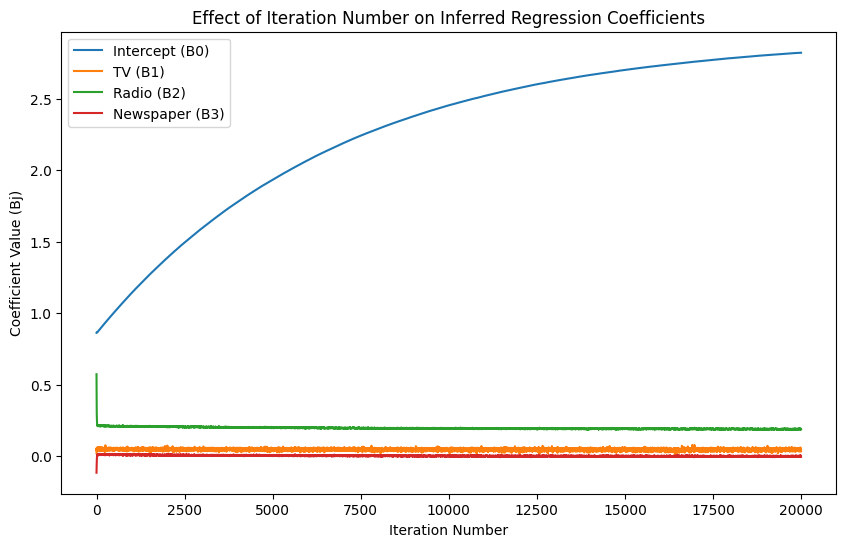

In [9]:
# Effect of Iteration on Inferred Regression Coefficients
plt.figure(figsize=(10, 6))

# Plot each coefficient over iterations
plt.plot(range(iterations), betas_history[:, 0], label='Intercept (B0)')
plt.plot(range(iterations), betas_history[:, 1], label='TV (B1)')
plt.plot(range(iterations), betas_history[:, 2], label='Radio (B2)')
plt.plot(range(iterations), betas_history[:, 3], label='Newspaper (B3)')

# Show Plot
plt.xlabel('Iteration Number')
plt.ylabel('Coefficient Value (Bj)')
plt.title('Effect of Iteration Number on Inferred Regression Coefficients')
plt.legend()
plt.show()

## Deliverable 2: Effect of Iteration Number on Cost

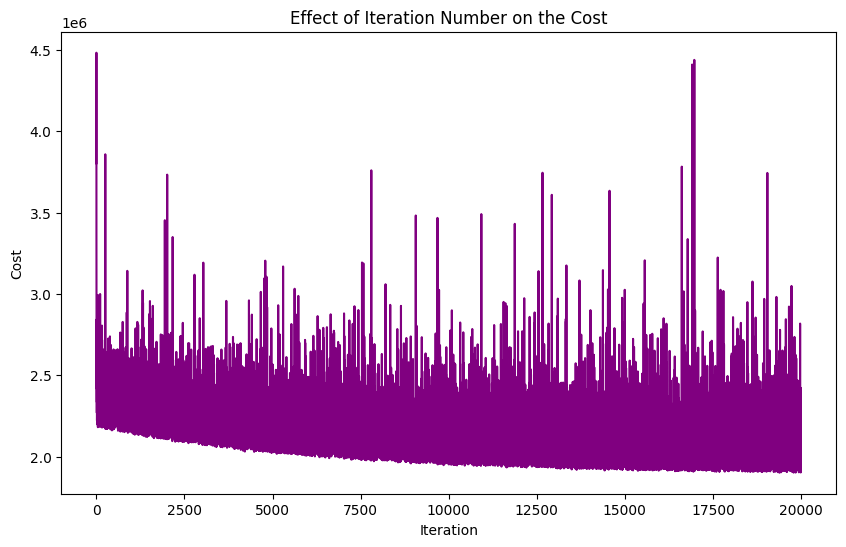

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), cost_history, color='purple')
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Effect of Iteration Number on the Cost")
plt.show()

## Deliverable 3: Estimates of Best-Fit Model Parameters

In [11]:
# Estimates of the best-fit model parameters
beta_hat = final_betas

print("Estimated best-fit model parameters (beta hat):")
print(beta_hat)

Estimated best-fit model parameters (beta hat):
[[ 2.8230316 ]
 [ 0.03662778]
 [ 0.18796509]
 [-0.00304078]]


## Deliverable 4: Computed Mean Squared Error (MSE)

In [12]:
# Compute mean squared error (MSE) using final beta
y_pred = np.dot(X, beta_hat)
MSE = np.square(np.subtract(y.flatten(), y_pred.flatten())).mean()  # Making y and y_pred 1D
print(f"Mean Squared Error (MSE): {MSE}")

Mean Squared Error (MSE): 5.755474938152055
